In [1]:
import pandas as pd
from sklearn import preprocessing
from neupy import environment
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from neupy import environment, algorithms, layers, estimators
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline

### <font color=blue> Scale</font>

In [2]:
training_df = pd.read_csv("train_70.0.csv").iloc[:,3:]
test_df = pd.read_csv("test_30.0.csv").iloc[:,3:]

from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler = StandardScaler()
scaler = MinMaxScaler()
training_df_scaled = pd.DataFrame(scaler.fit_transform(training_df), columns = training_df.columns)
testing_df_scaled = pd.DataFrame(scaler.transform(test_df), columns = training_df.columns)

In [3]:
training_X = training_df_scaled.iloc[:,:-1]
training_X.head(2)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.333333,0.103549,0.000710,0.00096,0.001061,0.029605,0.000000,0.000000,0.010989,0.580320,...,0.424521,0.1,0.8,0.750379,0.4,0.916667,0.9,0.9,0.8,0.8
1,0.476190,0.086708,0.000718,0.00096,0.001039,0.016447,0.034483,0.070312,0.000000,0.586442,...,0.360163,0.1,1.0,0.764815,0.3,0.900000,0.1,0.6,0.8,0.2


In [4]:
training_Y = training_df_scaled.iloc[:,-1:]
training_Y.head(2)

,shares
0,0.005503
1,0.002171


In [5]:
testing_X = testing_df_scaled.iloc[:,:-1]
testing_X.head(2)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.476190,0.141267,0.000602,0.00096,0.000839,0.032895,0.051724,0.257812,0.010989,0.579014,...,0.333534,0.100000,0.8,0.839286,0.50,0.928571,0.0,0.5,1.0,0.0
1,0.333333,0.070007,0.000813,0.00096,0.001135,0.029605,0.000000,0.007812,0.010989,0.569113,...,0.419786,0.136364,1.0,0.842500,0.75,0.900000,0.0,0.5,1.0,0.0


In [6]:
testing_Y = testing_df_scaled.iloc[:, -1:]
testing_Y.head(2)

,shares
0,0.004199
1,0.001882


### summary

In [7]:
training_X.iloc[:, :20].describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min
count,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000
mean,0.400184,0.076571,0.000792,0.000967,0.001071,0.035725,0.028416,0.035550,0.013791,0.565479,0.692633,0.052721,0.178919,0.157694,0.059712,0.185622,0.213045,0.070861,0.003897,0.007887
std,0.101180,0.065487,0.006002,0.006000,0.006001,0.036911,0.033090,0.065005,0.045919,0.105192,0.212179,0.223479,0.383291,0.364460,0.236956,0.388808,0.409467,0.183195,0.012785,0.015872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.034377,0.000671,0.000960,0.000963,0.013158,0.008621,0.007812,0.000000,0.557062,0.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001501,0.003584
50%,0.380952,0.057620,0.000768,0.000960,0.001062,0.026316,0.025862,0.007812,0.000000,0.579920,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002218,0.005923
75%,0.476190,0.100348,0.000868,0.000960,0.001161,0.046053,0.034483,0.031250,0.010989,0.603704,0.888889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013228,0.003351,0.008954
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
training_X.iloc[:, 21:40].describe()

,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02
count,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000
mean,0.893438,0.306999,0.309853,0.019001,0.083438,0.005557,0.012293,0.009119,0.170018,0.186198,0.186811,0.181369,0.144649,0.062306,0.068649,0.130955,0.199044,0.153150,0.235102
std,0.253048,0.159247,0.314414,0.020758,0.035418,0.026281,0.049893,0.033581,0.375655,0.389274,0.389767,0.385331,0.351753,0.241715,0.252860,0.337357,0.282944,0.237374,0.306810
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.205242,0.000277,0.011946,0.063377,0.000927,0.001304,0.001427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027019,0.027011,0.031056
50%,1.000000,0.289399,0.286076,0.014593,0.076324,0.001738,0.003320,0.003187,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036020,0.036012,0.043482
75%,1.000000,0.391591,0.568405,0.020159,0.095652,0.003766,0.009368,0.007459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.261283,0.163757,0.362351
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
training_X.iloc[:, 41:].describe()

,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000
mean,0.252949,0.443423,0.489140,0.254742,0.089649,0.682125,0.287785,0.353479,0.094863,0.757122,0.740217,0.477718,0.892240,0.282392,0.535477,0.684553,0.156543
std,0.312376,0.116622,0.092280,0.111687,0.058097,0.190274,0.156007,0.104605,0.070337,0.248100,0.128101,0.289994,0.096598,0.324514,0.133386,0.376818,0.227366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030818,0.396518,0.430719,0.182550,0.051994,0.600000,0.185185,0.306222,0.050000,0.600000,0.672028,0.300000,0.875000,0.000000,0.500000,0.333333,0.000000
50%,0.044027,0.453706,0.488971,0.251352,0.082766,0.710526,0.279412,0.358452,0.100000,0.800000,0.746432,0.500000,0.900000,0.141667,0.500000,1.000000,0.000000
75%,0.431373,0.507917,0.544748,0.323185,0.117552,0.800000,0.383333,0.410712,0.100000,1.000000,0.812500,0.700000,0.950000,0.500000,0.572869,1.000000,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### <font color= blue>MLP</font>

In [10]:
a = np.random.randn(5)
b = np.random.randn(5)
estimators.rmse(a, b) == math.sqrt(mean_squared_error(a, b))

True

In [11]:
from sklearn.neural_network import MLPRegressor
import math 

result = []
for thisactivation in tqdm(['tanh', 'relu', 'logistic']):
    for thisalpha in [0.0001, 1.0, 100]:
        for sz in [10, 50, 100]:
            mlpreg = MLPRegressor(hidden_layer_sizes= [sz,sz,sz],
                                 activation=thisactivation,
                                 alpha=thisalpha, solver='lbfgs').fit(training_X, training_Y)
            
            y_pred = mlpreg.predict(testing_X)
            result.append([sz, thisalpha, thisactivation, 
                           math.sqrt(mean_squared_error(testing_Y, y_pred)),
                          mean_absolute_error(testing_Y, y_pred)])

  0%|          | 0/3 [00:00<?, ?it/s]/home/lam/anaconda2/envs/neupy/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
100%|██████████| 3/3 [03:33<00:00, 71.05s/it] 


In [12]:
results_mlp = pd.DataFrame(result, columns=['size x size', 'alpha', 'activation', 'RMSE', 'MAE'])

#### <font color=blue>3 hidden layers, max 100 neurons</font>

In [13]:
results_mlp.sort_values(by=['RMSE'], ascending=[1]).head(5)

,size x size,alpha,activation,RMSE,MAE
12,10,1.0000,relu,0.018994,0.004692
18,10,0.0001,logistic,0.019000,0.004683
23,100,1.0000,logistic,0.019005,0.004689
26,100,100.0000,logistic,0.019010,0.004761
15,10,100.0000,relu,0.019010,0.004750


In [15]:
results_mlp.sort_values(by=['MAE'], ascending=[1]).head(5)

,size x size,alpha,activation,RMSE,MAE
24,10,100.0000,logistic,0.019011,0.004657
6,10,100.0000,tanh,0.019011,0.004679
18,10,0.0001,logistic,0.019000,0.004683
23,100,1.0000,logistic,0.019005,0.004689
17,100,100.0000,relu,0.019011,0.004691


### <font color=blue>My GRNN</font>

In [163]:
def generate_rmse_curves_testing_training_data(hyperparameter_values, validation_rmse, training_rmse, title_text, x_label_text):
    plt.figure()
    plt.xlabel(x_label_text)
    plt.ylabel("RMSE")
    plt.plot(hyperparameter_values, validation_rmse)
    plt.legend(['Test data'])    

In [16]:
result = []
rmse_training = []
rmse_testing = []
for s in tqdm(np.arange(0.05, 0.5, 5e-2)):
    grnnet = algorithms.GRNN(std=s, verbose=False)
    grnnet.train(training_X, training_Y)
    p_result = grnnet.predict(testing_X)
    result.append([s, math.sqrt(mean_squared_error(testing_Y, y_pred)),
                          mean_absolute_error(testing_Y, y_pred)])
    rmse_testing.append(estimators.rmse(p_result, testing_Y))        

100%|██████████| 9/9 [18:13<00:00, 121.52s/it]


In [17]:
results_GRNN = pd.DataFrame(result, columns=['std', 'RMSE', 'MAE'])

In [19]:
results_GRNN.sort_values('RMSE', ascending=1).head(5)

,std,RMSE,MAE
0,0.05,0.01901,0.004761
1,0.10,0.01901,0.004761
2,0.15,0.01901,0.004761
3,0.20,0.01901,0.004761
4,0.25,0.01901,0.004761


In [21]:
results_GRNN.sort_values('MAE', ascending=1).head(5)

,std,RMSE,MAE
0,0.05,0.01901,0.004761
1,0.10,0.01901,0.004761
2,0.15,0.01901,0.004761
3,0.20,0.01901,0.004761
4,0.25,0.01901,0.004761


#### <font color=blue>std 0.55 to 1</font>

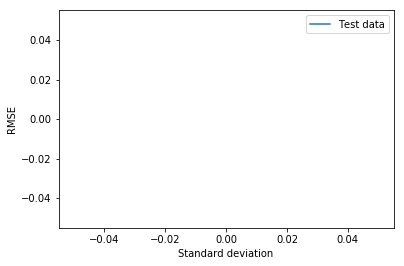

In [44]:
generate_rmse_curves_testing_training_data(np.arange(0.55, 1, 5e-2), rmse_testing, rmse_training, "RMSE with standard deviation", "Standard deviation")

#### <font color=blue>std 0.05 to 0.5</font>

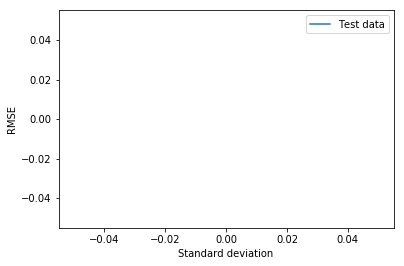

In [45]:
generate_rmse_curves_testing_training_data(np.arange(5e-2, 0.5, 5e-2), rmse_testing, rmse_training, "RMSE with standard deviation", "Standard deviation")

### NeuPy imports

In [46]:
environment.reproducible()

#### Get the RMSE for different values of STD

In [47]:
std_values = [0.1 + 0.1 * x for x in range(5)]
rmse_training = []
rmse_testing = []
for std_value in tqdm(std_values):
    nw = algorithms.GRNN(std=std_value, verbose=False)
    nw.train(training_X, training_Y)
    testing_Y_predicted = nw.predict(testing_X)
    rmse_testing.append(estimators.rmse(testing_Y_predicted, testing_Y))

  0%|          | 0/5 [00:00<?, ?it/s]


Main information

[ALGORITHM] GRNN

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] std = 0.1



 20%|██        | 1/5 [01:55<07:42, 115.66s/it]


Main information

[ALGORITHM] GRNN

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] std = 0.2



 40%|████      | 2/5 [03:51<05:47, 115.75s/it]


Main information

[ALGORITHM] GRNN

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] std = 0.30000000000000004



 60%|██████    | 3/5 [05:49<03:53, 116.56s/it]


Main information

[ALGORITHM] GRNN

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] std = 0.4



 80%|████████  | 4/5 [07:49<01:57, 117.28s/it]


Main information

[ALGORITHM] GRNN

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] std = 0.5



100%|██████████| 5/5 [09:47<00:00, 117.41s/it]


#### Generate the validation curves

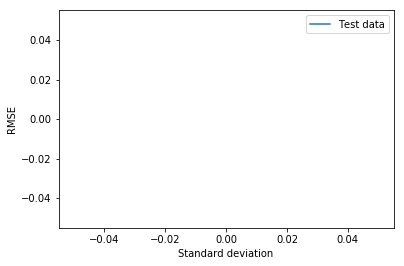

In [48]:
generate_rmse_curves_testing_training_data(std_values, rmse_testing, rmse_training, "RMSE with standard deviation", "Standard deviation")

#### Check the RMSE for the best candidate Standard deviation

### Invert the target values using [this](https://stackoverflow.com/questions/41551165/invert-minmaxscaler-from-scikit-learn)

In [52]:
y_predicted_upscaled = scaler.inverse_transform(y_predicted)
testing_Y_upscaled = scaler.inverse_transform(testing_Y)

In [ ]:
nw = algorithms.GRNN(std=1, verbose=False)
nw.train(training_X, training_Y)
y_predicted = nw.predict(testing_X)

In [181]:
print('RMSE' estimators.rmse(y_predicted, testing_Y))
print('MAE', mean_absolute_error(testing_Y, y_predicted))

1.2767123860148166
MAE 0.313673651996


### Check the predicted values

In [53]:
slice = 100
for itr in range(slice):
    print("#{0}. Diff={1}".format(itr, abs(y_predicted_upscaled[itr] - testing_Y_upscaled[itr])))

#0. Diff=[ 0.20519]
#1. Diff=[ 0.03921039]
#2. Diff=[ 1.11100432]
#3. Diff=[ 0.07181013]
#4. Diff=[ 0.05348331]
#5. Diff=[ 0.19575296]
#6. Diff=[ 0.02274353]
#7. Diff=[ 0.24757831]
#8. Diff=[ 0.00857691]
#9. Diff=[ 0.0015231]
#10. Diff=[ 0.12992895]
#11. Diff=[ 0.12638554]
#12. Diff=[ 1.27427208]
#13. Diff=[ 1.28835956]
#14. Diff=[ 0.09778768]
#15. Diff=[ 0.07354383]
#16. Diff=[ 0.16213276]
#17. Diff=[ 0.01920544]
#18. Diff=[ 0.04076442]
#19. Diff=[ 0.04043461]
#20. Diff=[ 0.16278003]
#21. Diff=[ 0.25028499]
#22. Diff=[ 0.11143517]
#23. Diff=[ 0.19226289]
#24. Diff=[ 0.01112243]
#25. Diff=[ 0.04077156]
#26. Diff=[ 0.20668579]
#27. Diff=[ 0.05217442]
#28. Diff=[ 0.19574083]
#29. Diff=[ 0.00655935]
#30. Diff=[ 0.01744817]
#31. Diff=[ 0.00654523]
#32. Diff=[ 0.07504252]
#33. Diff=[ 0.12827096]
#34. Diff=[ 0.0026266]
#35. Diff=[ 0.09123315]
#36. Diff=[ 0.03965395]
#37. Diff=[ 0.06962363]
#38. Diff=[ 0.04091821]
#39. Diff=[ 0.36084148]
#40. Diff=[ 0.05294627]
#41. Diff=[ 0.83516396]
#42. Di

### MLFF BP with conjugate gradient

In [59]:
environment.reproducible()
from neupy import algorithms, layers

cgnet = algorithms.ConjugateGradient(
    connection=[
        layers.Input(training_X.shape[1]),
        layers.Sigmoid(50),
        layers.Sigmoid(1),
    ],
    search_method='golden',
    show_epoch=1,
    verbose=True,
    addons=[algorithms.LinearSearch],
)


Main information

[ALGORITHM] ConjugateGradient

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = ['LinearSearch']
[OPTION] update_function = fletcher_reeves
[OPTION] maxiter = 10
[OPTION] search_method = golden
[OPTION] tol = 0.1

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 1.68 seconds


#### Note: table below shows MSE - need to take sqrt to get the RMSE


Start training

[TRAINING DATA] shapes: (27750, 59)
[TEST DATA] shapes: (11894, 59)
[TRAINING] Total epochs: 5

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |     0.99648 |       0.997 |      875 ms |
|           2 |     0.89234 |     0.91326 |       1 sec |
|           3 |     0.83007 |     0.86175 |       1 sec |
|           4 |     0.82233 |     0.85312 |      928 ms |
|           5 |      0.8169 |     0.84817 |       1 sec |
---------------------------------------------------------



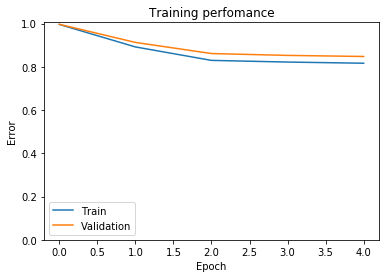

In [60]:
cgnet.train(training_X, training_Y, testing_X, testing_Y, epochs=5)
from neupy import plots
plots.error_plot(cgnet)

In [61]:
from neupy.estimators import rmsle

y_predict = cgnet.predict(testing_X).round(3)

# Root mean square logarithmic error
error = rmsle(scaler.inverse_transform(testing_Y), scaler.inverse_transform(y_predict))
print(error)

0.20992865410911177


In [62]:
from neupy.estimators import rmse

error = rmse(scaler.inverse_transform(testing_Y), scaler.inverse_transform(y_predict))
print(error)

0.9209532081880764


In [63]:
def print_abs_difference_of_predictions(data_scaler, actual_values, predicted_values, slice = 100):
    print(actual_values.shape)
    print(predicted_values.shape)
    actual_values_upscaled = data_scaler.inverse_transform(actual_values)
    predicted_values_upscaled = data_scaler.inverse_transform(predicted_values)

    for itr in range(slice):
        print("#{0}. Diff={1}".format(itr, abs(predicted_values_upscaled[itr] - actual_values_upscaled[itr])))

### SOM using [Neupy](http://neupy.com/apidocs/neupy.algorithms.competitive.sofm.html)

In [64]:
num_epochs = 100
num_clusters = 30
num_features = training_X.shape[1]

In [65]:
# n_inputs is the number of features

sofm = algorithms.SOFM(n_inputs=num_features, n_outputs=num_clusters, step=0.1, learning_radius=0, verbose=True, grid_type='rect')
sofm.train(training_X, epochs=num_epochs)
print(sofm.weight.shape)


Main information

[ALGORITHM] SOFM

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] n_inputs = 59
[OPTION] distance = euclid
[OPTION] features_grid = None
[OPTION] grid_type = rect
[OPTION] learning_radius = 0
[OPTION] n_outputs = 30
[OPTION] reduce_radius_after = 100
[OPTION] reduce_std_after = 100
[OPTION] reduce_step_after = 100
[OPTION] std = 1
[OPTION] weight = Normal(mean=0, std=0.01)


Start training

[TRAINING DATA] shapes: (27750, 59)
[TRAINING] Total epochs: 100

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |     0.44814 |           - |       5 sec |
|           2 |     0.44851 |           - |       5 sec |
|           3 |     0.44834 |           - |       5 sec |
|           4 |     0.44794 |           - |     

#### Get the predictions for the training set and then get the average of the number of shares for the clusters

In [66]:
trainingX_predictions = sofm.predict(training_X)
cluster_sums = np.zeros(num_clusters)
cluster_counts = np.zeros(num_clusters)
for idx, prediction in enumerate(trainingX_predictions):
    predicted_label = np.argmax(prediction)
    cluster_sums[predicted_label] += training_Y[idx]
    cluster_counts[predicted_label] += 1

#print(cluster_counts)
cluster_averages = cluster_sums/(1+cluster_counts)
print(cluster_averages)

[ -1.43213494e-01   3.32609461e-02   5.82208947e-02   1.62145091e-02
   1.15669491e-01   3.18439214e-01   1.48134220e-01  -2.94372953e-02
   6.34181744e-02  -2.46751716e-03   1.03431751e-01   9.68163576e-03
  -5.44474239e-03  -6.08135529e-02  -2.51063734e-02  -8.53507146e-02
  -4.66830972e-02  -3.19961432e-02   1.23176489e+00   2.81675364e+01
  -1.07334154e-02  -4.64782429e-02   9.73415179e-02   1.67033173e-01
  -1.11779486e-01   5.50176511e-02  -9.54155711e-02  -3.50685071e-02
   1.60071422e-01   2.81578063e-01]


#### Get the predictions for the test data

In [67]:
testing_X_predictions = sofm.predict(testing_X)
square_error = 0
predicted_values = []

for idx, prediction in enumerate(testing_X_predictions):
    predicted_label = np.argmax(prediction)
    predicted_shares = cluster_averages[predicted_label]
    predicted_values.append(predicted_shares)
    actual_shares = testing_Y[idx]
    square_error += (predicted_shares-actual_shares)**2

rmse = math.sqrt(square_error/len(testing_X))
print("RMSE: " + str(rmse))

RMSE: 0.6678572613843193


In [ ]:
print_abs_difference_of_predictions(scaler, testing_Y, np.array(predicted_values).reshape(-1, 1), 30)